In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.cross_decomposition import CCA as CCA_sklearn

In [3]:
%load_ext autoreload
%autoreload 2

In [91]:
plt.style.use('ggplot')

In [4]:
from cca import CCA
from ncca import GaussianKdeNCCA

# (0) A simple example from scikit-learn

In [5]:
X = np.array([[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [3.,5.,4.]]).T
Y = np.array([[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]).T

## CCA from sklearn

In [6]:
cca_sklearn = CCA_sklearn(n_components=2)
cca_sklearn.fit(X.T, Y.T)
X_c, Y_c = cca_sklearn.transform(X.T, Y.T)
X_c = X_c.T
Y_c = Y_c.T
X_c.shape, Y_c.shape

((2, 4), (2, 4))

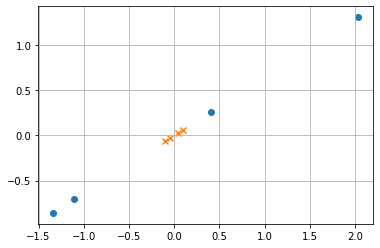

In [7]:
plt.scatter(X_c[0], Y_c[0], cmap='rainbow')
plt.scatter(X_c[1], Y_c[1], cmap='rainbow', marker='x')
plt.axis('equal')
plt.grid('on')
plt.show()

## Homemade CCA

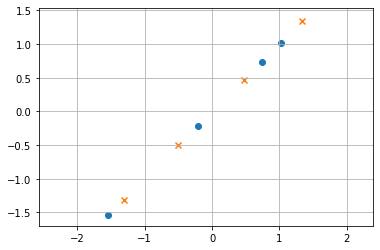

In [8]:
cca = CCA().fit(X, Y)
X_c, Y_c = cca.project(X, Y)
plt.scatter(X_c[0], Y_c[0], cmap='rainbow')
plt.scatter(X_c[1], Y_c[1], cmap='rainbow', marker='x')
plt.axis('equal')
plt.grid('on')
plt.show()

In [9]:
X_c

array([[ 1.01989784,  0.73543342, -0.21496201, -1.54036925],
       [ 0.4717644 , -1.31266288,  1.34262042, -0.50172194]])

# (1) Joint Gaussians

In [42]:
dim = 4
A = np.random.uniform(size=(dim, dim))
cov = A @ A.T
Z = np.random.multivariate_normal(mean=np.zeros(4), cov=cov, size=500)
X, Y = (Z.T)[:2], (Z.T)[2:]
c = X[0]

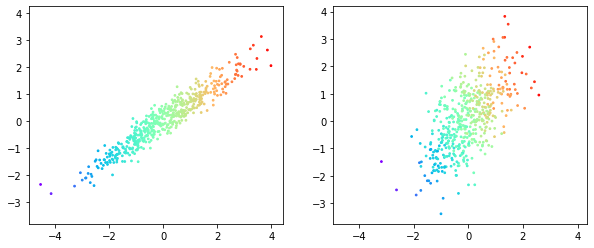

In [43]:
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(X[0], X[1], c=c, s=3, cmap='rainbow')
axes[0].axis('equal');
axes[1].scatter(Y[0], Y[1], c=c, s=3, cmap='rainbow')
axes[1].axis('equal');

## CCA from sklearn

In [45]:
cca_sklearn = CCA_sklearn(n_components=2)
cca_sklearn.fit(X.T, Y.T)
X_c, Y_c = cca_sklearn.transform(X.T, Y.T)

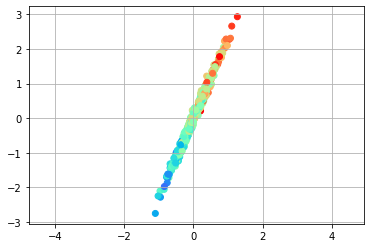

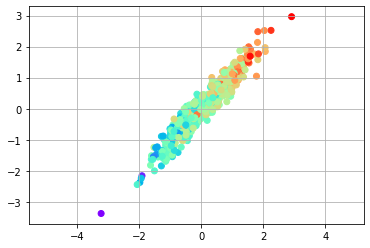

In [46]:
plt.scatter(X_c[:, 0], Y_c[:, 0], c=c, cmap='rainbow')
plt.axis('equal')
plt.grid('on')
plt.show()
plt.scatter(X_c[:, 1], Y_c[:, 1], c=c, cmap='rainbow')
plt.axis('equal')
plt.grid('on')

## Homemade CCA

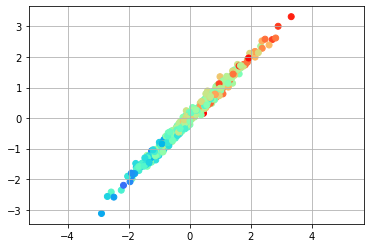

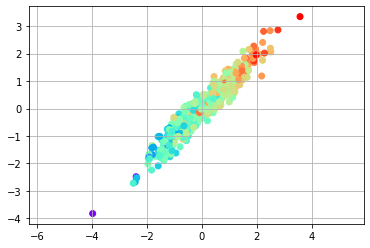

In [47]:
cca = CCA().fit(X, Y)
X_c, Y_c = cca.project(X, Y)
plt.scatter(X_c[0], Y_c[0], c=c, cmap='rainbow')
plt.axis('equal')
plt.grid('on')
plt.show()
plt.scatter(X_c[1], Y_c[1], c=c, cmap='rainbow')
plt.axis('equal')
plt.grid('on')

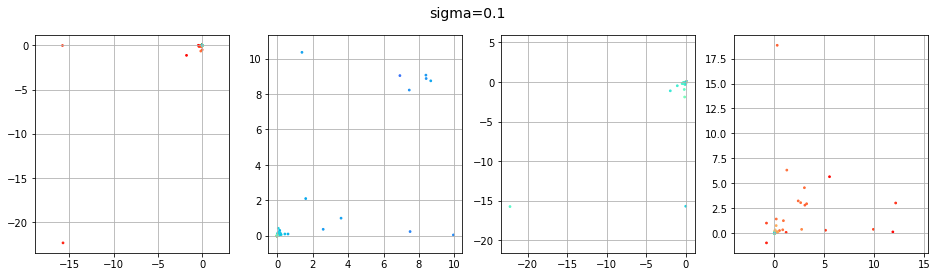

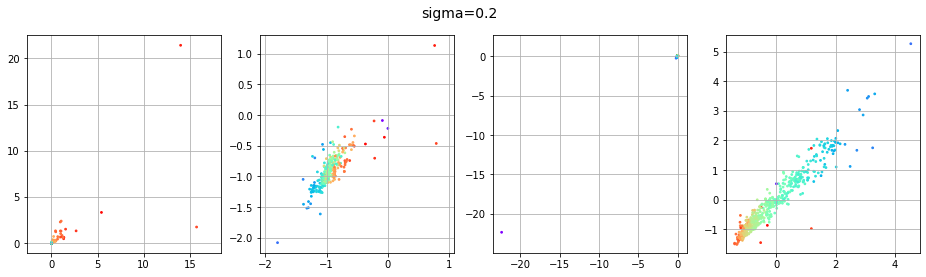

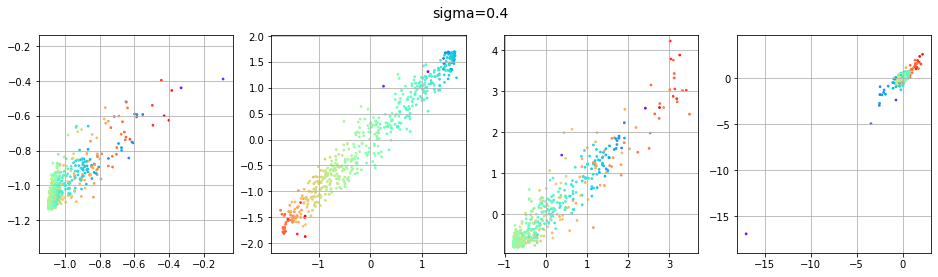

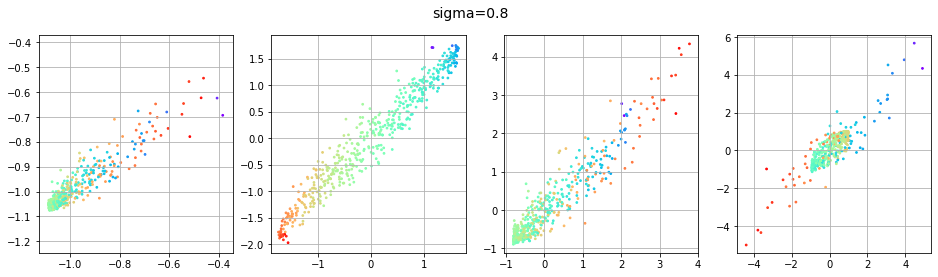

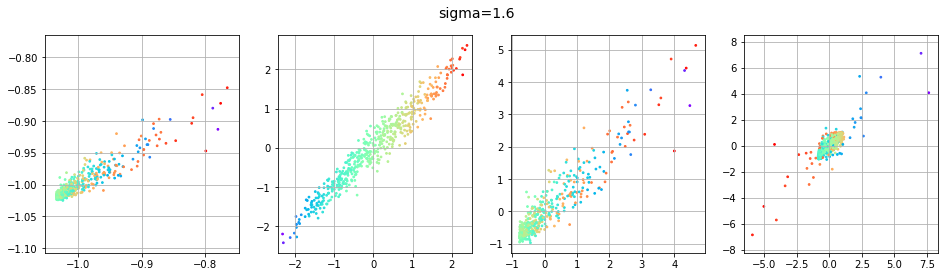

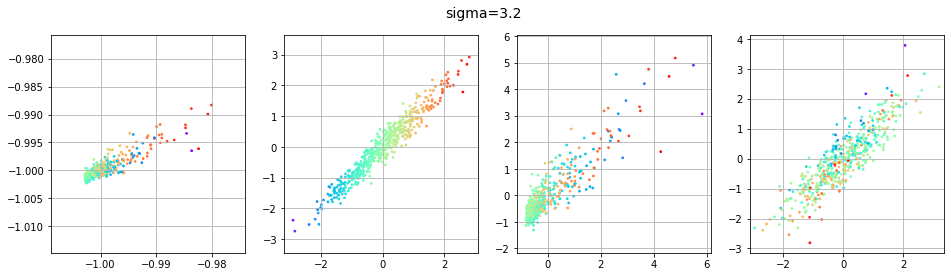

In [48]:
sigmas = [0.1, 0.2, 0.4, 0.8, 1.6, 3.2]
for sigma in sigmas:
    sigma_x = sigma_y = sigma
    ncca = GaussianKdeNCCA(sigma_x=sigma_x, sigma_y=sigma_y).fit(X, Y)
    X_c = ncca.projections_x
    Y_c = ncca.projections_y

    figs, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4)) #, sharex=True, sharey=True)

    fig = plt.gcf()
    fig.suptitle("sigma={}".format(sigma_x), fontsize=14)

    for i in range(4):
        axes[i].scatter(X_c[i], Y_c[i], c=c, s=3, cmap='rainbow')
        axes[i].axis('equal');
        axes[i].grid()

# (2) Spiral data 

In [49]:
from utils import spiral_2d

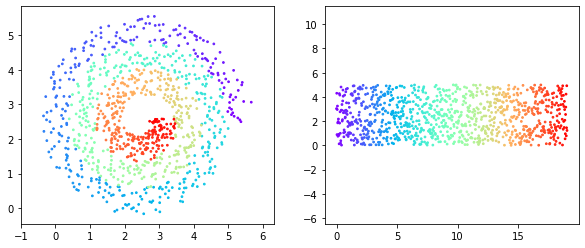

In [50]:
# Generate data
X, c = spiral_2d(1)
X = X * 5
Y, c = np.stack([c, 5 * np.random.uniform(size=len(c))], axis=1).T, c

figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(X[0], X[1], c=c, s=3, cmap='rainbow')
axes[0].axis('equal');
axes[1].scatter(Y[0], Y[1], c=c, s=3, cmap='rainbow')
axes[1].axis('equal');

## CCA from sklearn

In [55]:
cca_sklearn = CCA_sklearn(n_components=2)
cca_sklearn.fit(X.T, Y.T)
X_c, Y_c = cca_sklearn.transform(X.T, Y.T)

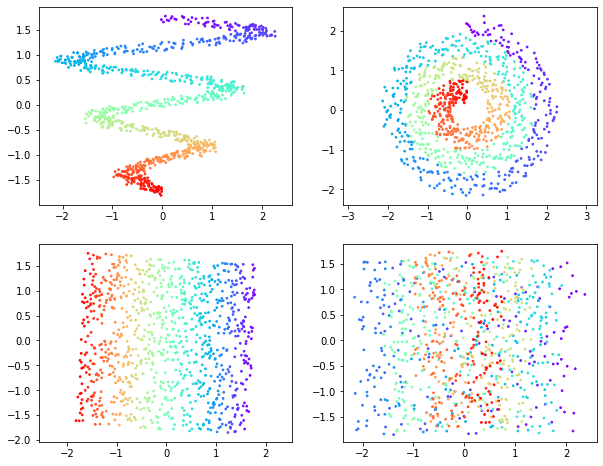

In [56]:
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

data = [[(X_c[:, 0], Y_c[:, 0]),
         (X_c[:, 0], X_c[:, 1]),],
        [(Y_c[:, 0], Y_c[:, 1]),
         (X_c[:, 1], Y_c[:, 1]),]]


for i in range(2):
    for j in range(2):        
        axes[i][j].scatter(*data[i][j], c=c, s=3, cmap='rainbow')
        axes[i][j].axis('equal');

## Homemade CCA

In [57]:
cca = CCA().fit(X, Y)
X_c, Y_c = cca.project(X, Y)

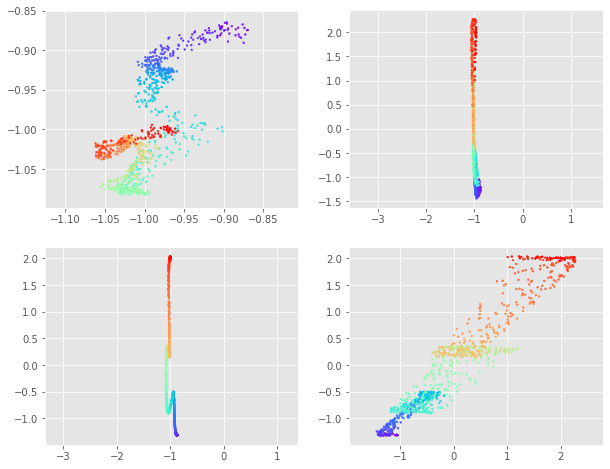

In [92]:
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

data = [[(X_c[0], Y_c[0]),
         (X_c[0], X_c[1]),],
        [(Y_c[0], Y_c[1]),
         (X_c[1], Y_c[1]),]]


for i in range(2):
    for j in range(2):        
        axes[i][j].scatter(*data[i][j], c=c, s=3, cmap='rainbow')
        axes[i][j].axis('equal');

## Original NCCA with Gaussian KDE

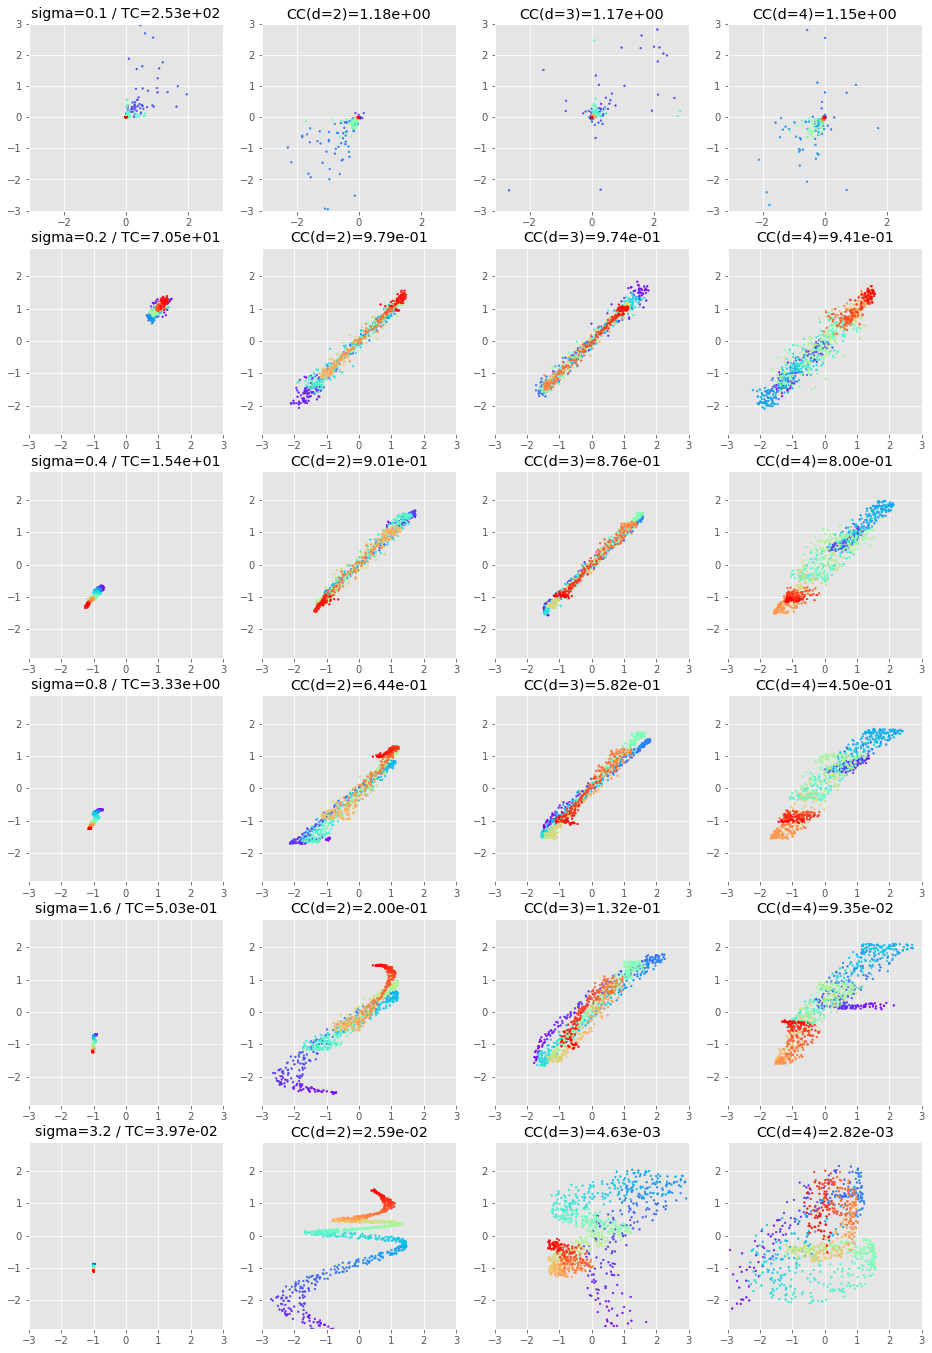

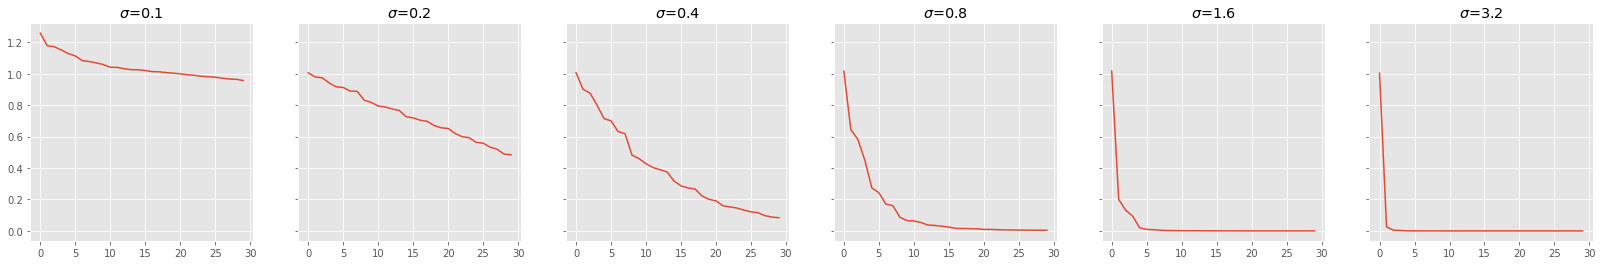

In [137]:
sigmas = [0.1, 0.2, 0.4, 0.8, 1.6, 3.2]
figs, axes = plt.subplots(nrows=len(sigmas), ncols=4, figsize=(16, 4 * len(sigmas)))

ccs = []

for ik, sigma in enumerate(sigmas):
    sigma_x = sigma_y = sigma
    ncca = GaussianKdeNCCA(sigma_x=sigma_x, sigma_y=sigma_y).fit(X, Y)
    X_c = ncca.projections_x
    Y_c = ncca.projections_y

    for i in range(4):
        axes[ik][i].scatter(X_c[i], Y_c[i], c=c, s=3, cmap='rainbow')
        axes[ik][i].axis('equal');
        axes[ik][i].set_xlim([-3, 3]);
        axes[ik][i].set_ylim([-3, 3]);
        if i > 0:
            axes[ik][i].set_title("CC(d={})={:.2e}".format(i+1, ncca.canonical_correlations[i]))
    axes[ik][0].set_title("sigma={} / TC={:.2e}".format(sigma_x, ncca.canonical_correlations[1:].sum()), fontsize=14)
    ccs.append(ncca.canonical_correlations)
    
figs, axes = plt.subplots(ncols=len(sigmas), nrows=1, figsize=(4 * len(ks), 4), sharey=True)
for ik, sigma in enumerate(sigmas):
    axes[ik].set_title('$\sigma$={}'.format(sigma))
    axes[ik].plot(ccs[ik][:30])

## NCCA with self-tuned bandwidth

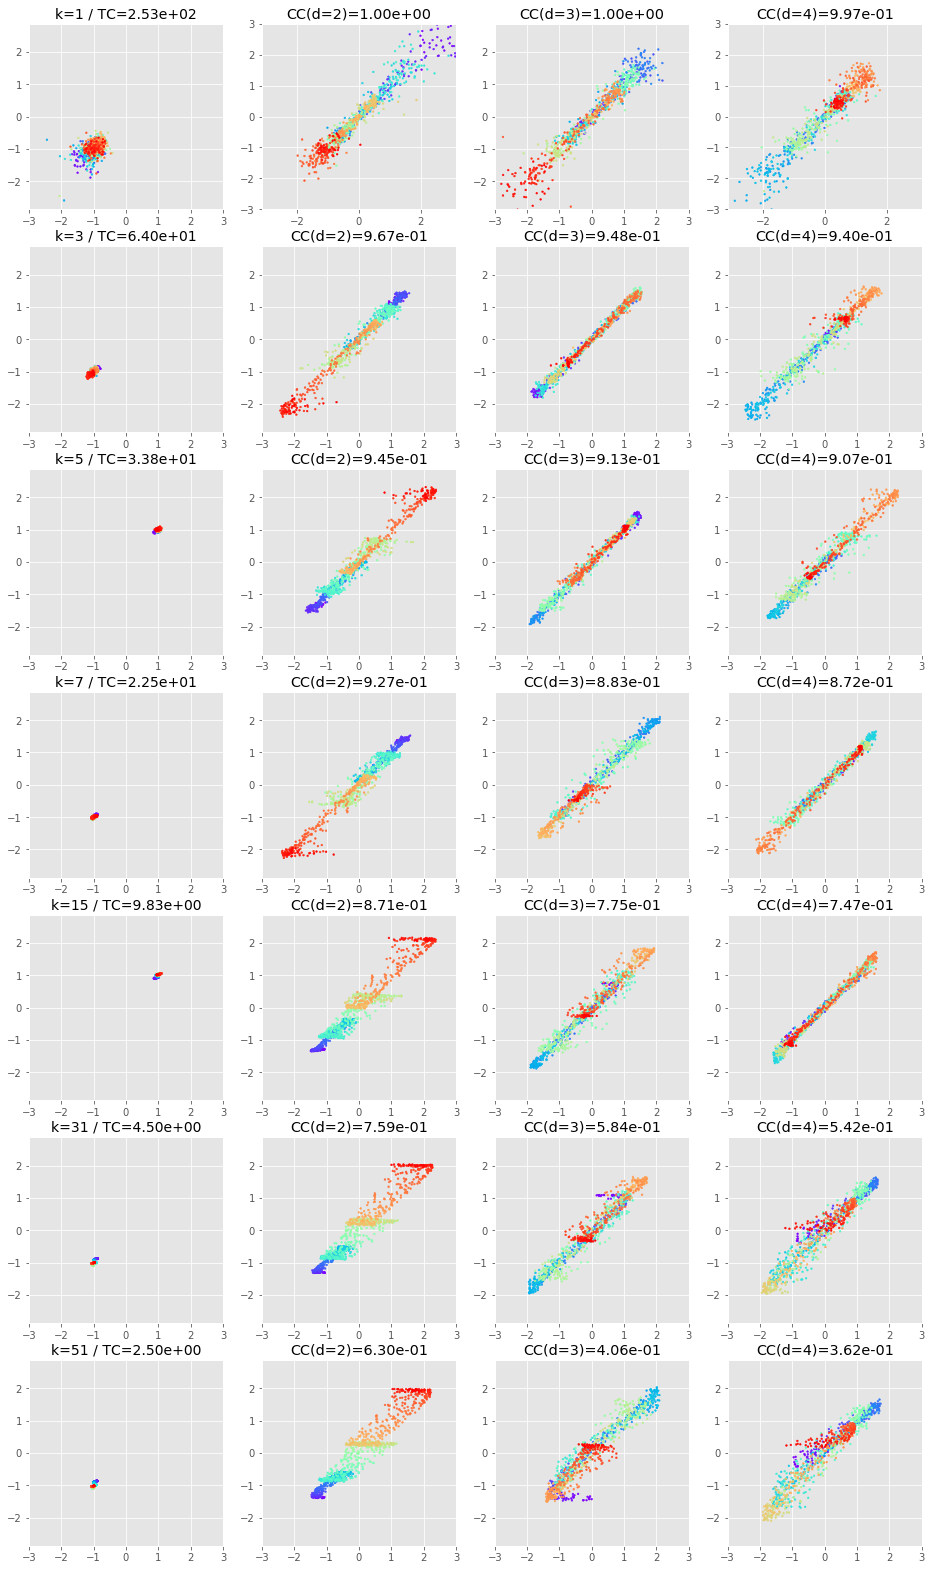

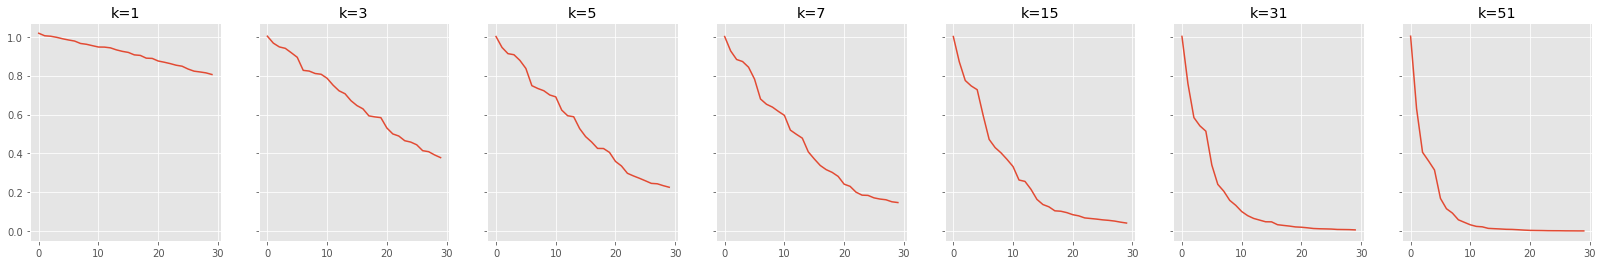

In [136]:
ks = [1, 3, 5, 7, 15, 31, 51]
figs, axes = plt.subplots(nrows=len(ks), ncols=4, figsize=(16, 4 * len(ks)))

ccs = []

for ik, k in enumerate(ks):
    ncca = GaussianKdeNCCA(self_tuning_k=k).fit(X, Y)
    X_c = ncca.projections_x
    Y_c = ncca.projections_y

    for i in range(4):
        axes[ik][i].scatter(X_c[i], Y_c[i], c=c, s=3, cmap='rainbow')
        axes[ik][i].axis('equal');
        axes[ik][i].set_xlim([-3, 3]);
        axes[ik][i].set_ylim([-3, 3]);
        if i > 0:
            axes[ik][i].set_title("CC(d={})={:.2e}".format(i+1, ncca.canonical_correlations[i]))
    axes[ik][0].set_title("k={} / TC={:.2e}".format(k, ncca.canonical_correlations[1:].sum()), fontsize=14)
    ccs.append(ncca.canonical_correlations)
    
figs, axes = plt.subplots(ncols=len(ks), nrows=1, figsize=(4 * len(ks), 4), sharey=True)
for ik, k in enumerate(ks):
    axes[ik].set_title('k={}'.format(k))
    axes[ik].plot(ccs[ik][:30])